In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

import pyrepseq.plotting as pp

plt.style.use('bmh')

In [2]:
df = pd.read_csv('../data/compairr_benchmark.csv', index_col=0)
df = df[df['n_repertoire']>1]
df.head()

,runtime,algorithm,n_sequence,distance,measure,n_repertoire
3,1.710112,Compairr,407713,1,hamming,2
5,4.095441,Compairr,765218,1,hamming,4
7,14.965534,Compairr,1601656,1,hamming,8
9,51.011313,Compairr,2902861,1,hamming,16
10,174.202838,Compairr,5753574,1,hamming,32


In [6]:
df.groupby(by=["algorithm","n_repertoire","distance"]).agg(['mean','size'])

runtime         n_sequence  \
                                                   mean size          mean   
algorithm            n_repertoire distance                                   
Compairr             2            1            1.488521   30  3.656962e+05   
                                  2          108.626796   30  3.656962e+05   
                     4            1            3.995358   30  7.084102e+05   
                                  2          253.950810   30  7.084102e+05   
                     8            1           13.304355   30  1.425608e+06   
                                  2          659.889387   30  1.425608e+06   
                     16           1           45.295417   30  2.820848e+06   
                                  2         1952.638556   30  2.820848e+06   
                     32           1          151.593088   30  5.449738e+06   
                     64           1          585.691127   30  1.133831e+07   
SymDel lookup        2            1           21.229147   30  3.614424e+05   
                                  2           22.447793   30  3.614424e+05   
                     4            1           54.385225   30  7.150712e+05   
                                  2           56.279575   30  7.150712e+05   
                     8            1          145.298625   30  1.405084e+06   
                                  2          149.652391   30  1.405084e+06   
                     16           1          451.022728   30  2.774316e+06   
                                  2          462.543226   30  2.774316e+06   
XTNeighbor-streaming 2            1            0.816435   30  3.671918e+05   
                                  2            3.608423   30  3.671918e+05   
                     4            1            1.261356   30  7.043524e+05   
                                  2            7.424296   30  7.043524e+05   
                     8            1            2.154123   30  1.424044e+06   
                                  2           17.181365   30  1.424044e+06   
                     16           1            3.986554   30  2.875230e+06   
                                  2           43.537217   30  2.875230e+06   
                     32           1            7.725153   30  5.662637e+06   
                                  2          122.084667   30  5.662637e+06   
                     64           1           16.522537   30  1.145167e+07   

                                                 
                                           size  
algorithm            n_repertoire distance       
Compairr             2            1          30  
                                  2          30  
                     4            1          30  
                                  2          30  
                     8            1          30  
                                  2          30  
                     16           1          30  
                                  2          30  
                     32           1          30  
                     64           1          30  
SymDel lookup        2            1          30  
                                  2          30  
                     4            1          30  
                                  2          30  
                     8            1          30  
                                  2          30  
                     16           1          30  
                                  2          30  
XTNeighbor-streaming 2            1          30  
                                  2          30  
                     4            1          30  
                                  2          30  
                     8            1          30  
                                  2          30  
                     16           1          30  
                                  2          30  
                     32           1          30  
                                  2          30  
 

In [3]:
algorithms = ['Compairr', 'SymDel lookup', 'XTNeighbor-streaming']
algorithm_labels = {
                    'Compairr' : 'CompAIRR (CPU)',
                    'SymDel lookup' : 'SymDel lookup (CPU)',
                    'XTNeighbor-streaming' : 'XTNeighbor-streaming (GPU)'
                   }

Compairr 1 1.85, 0.06
SymDel lookup 1 1.53, 0.06
XTNeighbor-streaming 1 1.03, 0.04
Compairr 2 1.47, 0.05
SymDel lookup 2 1.52, 0.06
XTNeighbor-streaming 2 1.41, 0.04


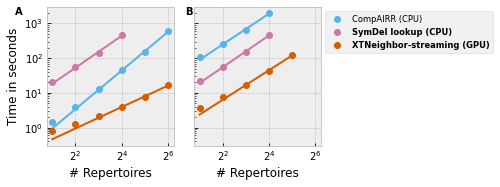

In [4]:
fig, axes = plt.subplots(figsize=(6.8, 2.4), ncols=2, sharey=True, sharex=True)
for d in [1, 2]:
    for index, algorithm in enumerate(algorithms):
        data = df[(df['distance']==d) & (df['algorithm']==algorithm)]
        mean = data.groupby('n_repertoire').mean(numeric_only=True)
        x, y = mean.index, mean['runtime']

        slope, intercept, r, p, se = scipy.stats.linregress(np.log(x[-3:]), np.log(y[-3:]))
        print(algorithm, d, f'{slope:.3}, {se:.1}')
        l, = axes[d-1].plot(x, y, 'o',
                label=algorithm_labels[algorithm],
                color=f'C{6-index}')
        axes[d-1].plot(x, np.exp(slope*np.log(x)+intercept), '-', color=l.get_color())
    axes[d-1].set_yscale('log')
    axes[d-1].set_xscale('log', base=2)
    axes[d-1].set_xlabel('# Repertoires')
axes[0].set_ylabel('Time in seconds')
legend = axes[-1].legend(bbox_to_anchor=(1, 1), fontsize='small')
legend_texts = legend.get_texts()
for i in range(1, 3):
    legend_texts[-i].set_weight('bold') 
axes[0].text(-0.25, 1.0, 'A', transform=axes[0].transAxes, fontweight="bold", va="top")
fig.tight_layout(w_pad=2, pad=0.0)
axes[1].text(-0.07, 1.0, 'B', transform=axes[1].transAxes, fontweight="bold", va="top")
fig.savefig('compairr_benchmark.pdf')